## 1D Convolution for sequence data

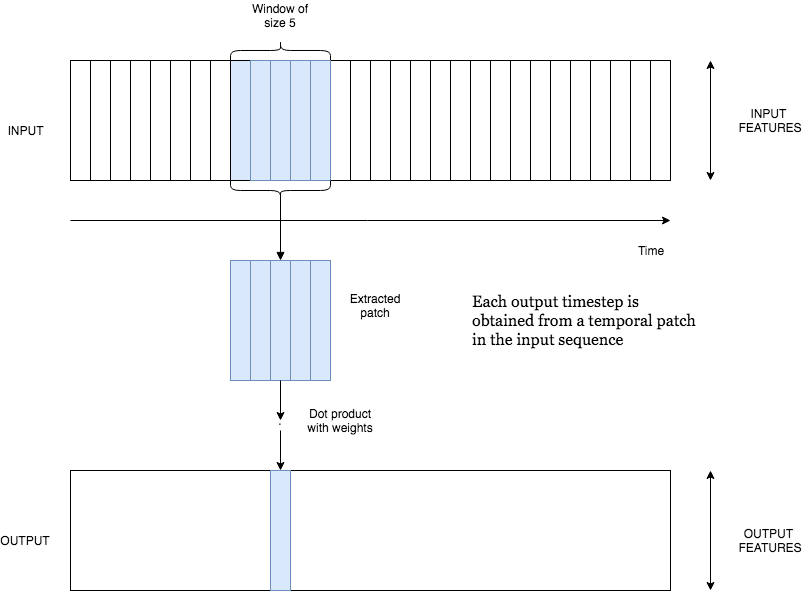

In [1]:
from keras.datasets import imdb

In [2]:
from keras.preprocessing import sequence

In [3]:
max_features = 10000
max_len = 500

In [4]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [5]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

Pad sequences (samples x time)
x_train shape:  (25000, 500)
x_test shape:  (25000, 500)


In [6]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [8]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPool1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.7679 - acc: 0.5192 - val_loss: 0.6864 - val_acc: 0.5740
Epoch 2/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.6685 - acc: 0.6613 - val_loss: 0.6667 - val_acc: 0.6372
Epoch 3/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.6262 - acc: 0.7537 - val_loss: 0.6149 - val_acc: 0.7172
Epoch 4/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.5335 - acc: 0.8042 - val_loss: 0.4946 - val_acc: 0.8038
Epoch 5/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.4111 - acc: 0.8434 - val_loss: 0.4238 - val_acc: 0.8372
Epoch 6/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.3409 - acc: 0.8687 - val_loss: 0.4102 - val_acc: 0.8388
Epoch 7/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.3015 - acc: 0.8656 - val_loss: 0.4078 - val_acc: